# Beispiel zur 2. Vorlesung: Bestimmung des flachen Ausgangs des linearisierten Modells eines verschieblichen Pendels
## Variante über Polynommatrixdarstellung und Hermite-Form

Unter Verwendung des Paketes SymPy

Getested unter Python 3.11 und SymPy 1.12

**Achtung:** Die Rechnungen in diesem Notebook können etwas Zeit in Anspruch nehmen!

---

Die aktuelle Fassung dieses Notebooks findet sich in folgendem Repositorium:

https://gitlab.hrz.tu-chemnitz.de/rst/public/teaching/flavert-nbviewer-content

**Sie können zur Entwicklung/ Verbesserung über Merge Requests beitragen!**

---

<p style="font-family:Courier New; font-size:10pt">
Copyright (c) 2023 - 2024 Jan Winkler, TU Dresden, Germany
</p>

<p style="font-family:Courier New; font-size:10pt">
This program is free software: you can redistribute it and/or modify<br>
it under the terms of the GNU General Public License as published by<br>
the Free Software Foundation, either version 3 of the License, or<br>
(at your option) any later version.
</p>
    
<p style="font-family:Courier New; font-size:10pt">
This program is distributed in the hope that it will be useful,<br>
but WITHOUT ANY WARRANTY; without even the implied warranty of<br>
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the<br>
GNU General Public License for more details: <br>
<a href=https://www.gnu.org/licenses/gpl-3.0.txt>https://www.gnu.org/licenses/gpl-3.0.txt</a>.
</p>

---

In [1]:
import sympy as sp
from sympy import init_printing
init_printing(use_latex=True)

## Definition der nötigen Symbole

hier über die Funktion `symbols` anstelle über die Einzelinstanzierung mittels der `Symbol`-Klasse

In [2]:
M, m, b, g, l, J, dt, dt2, t = sp.symbols('M, m, b, g, l, J, d_t, d_t^2, t')

## Definition des Systemgrößenvektors

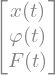

In [3]:
x = sp.Function('x')(t)
phi = sp.Function('\\varphi')(t)
Fin = sp.Function('F')(t)
z = sp.Matrix([x, phi, Fin])
z

## Definition der Systemmatrix

Hinweis: $d_t$ ist der Ableitungsoperator $\frac{d}{dt}$

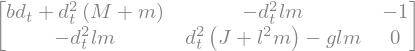

In [4]:
F = sp.Matrix([[(M + m) * dt2 + b * dt, -m * l * dt2, -1], [-m*l*dt2, (J + m*l**2)*dt2 - m*g*l, 0]])
F

## Aufstellen der Hermiteform
### Erste Transformation
Matrix $\bar V_1$, entfernt die Terme mit Ableitungsoperatoren in der ersten Zeile

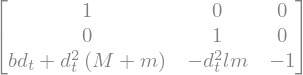

In [5]:
V1Bar = sp.Matrix([[1, 0, 0], [0, 1, 0], [(M + m) * dt2 + b * dt, -m * l * dt2, -1]])
V1Bar

Ergebnis der Transformation:

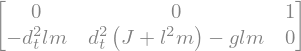

In [6]:
F*V1Bar

### Zweite Transformation

$\bar{V}_2$, bringt die 1 von rechts oben nach links oben

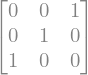

In [7]:
V2Bar = sp.Matrix([[0, 0, 1], [0, 1, 0], [1, 0, 0]])
V2Bar

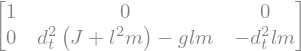

In [8]:
F*V1Bar*V2Bar

### Dritte Transformation

$\bar V_3$, entfernt die Ableitungsoperatoren aus dem zweiten Element der letzten Zeile

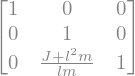

In [9]:
V3Bar = sp.Matrix([[1, 0, 0], [0, 1, 0], [0, (J + m*l**2)/(m*l), 1]])
V3Bar

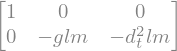

In [10]:
F*V1Bar*V2Bar*V3Bar

### Vierte Transformation

$\bar V_4$, entfernt das zweite Element der letzten Zeile, so dass dann die Hermite-Form entsteht

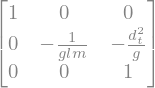

In [11]:
V4Bar = sp.Matrix([[1, 0, 0], [0, -1/(m*g*l), -1/g*dt2], [0, 0, 1]])
V4Bar

### Matrix $F$ in Hermite-Form $H$

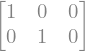

In [12]:
H = F*V1Bar*V2Bar*V3Bar*V4Bar
H

### Gesamt-Transformationsmatrix

Es gilt: $z = V \cdot \bar z$ mit $F \cdot z = 0$ und $H \cdot \bar z = 0$ mit $H$ in Hermite-Form sowie $V = (V_1, V_2)$

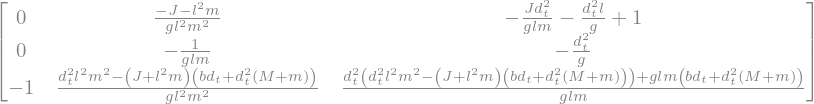

In [13]:
V = V1Bar*V2Bar*V3Bar*V4Bar
V.simplify()
V

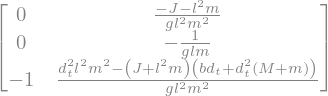

In [14]:
V1 = V[0:3, 0:2]
V1

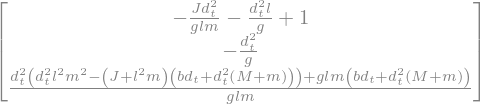

In [15]:
V2 = V[0:3, 2]
V2

### Invertierte Gesamt-Transformationsmatrix

Es gilt:
\begin{equation}
\tilde V^{-1} =
\begin{pmatrix}
\tilde V_1\\ \tilde V_2
\end{pmatrix}
\end{equation}

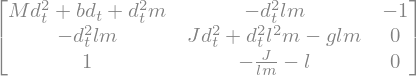

In [16]:
VInv = V**(-1)
VInv

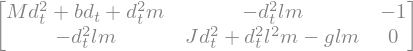

In [17]:
V1Tilde = VInv[0:2,0:3]
V1Tilde

In [18]:
V2Tilde = VInv[2, 0:3]
V2Tilde

## Berechnung des flachen Ausgangs

Es gilt: $y = \tilde V_2 \cdot z$

In [19]:
V2Tilde*z

Bemerkung: Physikalische Interpretation?

## Parametrierung der Systemgrößen durch den flachen Ausgang

Es gilt: $z = V_2 y$

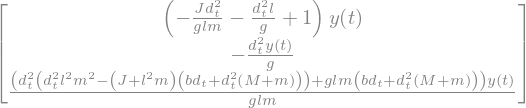

In [20]:
y = sp.Function('y')(t)
V2*y

Offenbar hängt $x$ nur von $y$ und $\ddot y$ und $\varphi$ nur von $\ddot y$ ab. $u$ hingegen von $y$, $\dot y$, $\ddot y$, $y^{(3)}$, $y^{(4)}$. Vergleiche auch identisches Ergebnis in Notebook `V2_Verschiebliches_Pendel_Linear_Flachheit_Steuerbarkeit`

(Wir werden später Methoden kennenlernen, wie man in sympy den Differentialoperator direkt auf eine Funktion anwenden kann, hier bleibt ja das $d_t$ unausgewertet stehen.)